In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rmse_folder = "../1ubq_data/rmse/"

In [3]:
colors = ['#05668D','#26bcf7','#6A4E24','#D4B483','firebrick','#B46A6B','#022B3B','#60046E']
plot_legend_test_list = ["Anmr-stn-3P", "Anmr-met-3P","Anmr-stn-4P", "Anmr-met-4P","Anmr-stn-5P", "Anmr-met-5P", "Adef-stn-3P", "C36m-stn-3P"]
inFolder_names = ["001", "002", "015", "003", "010", "014", "011", "c36"]

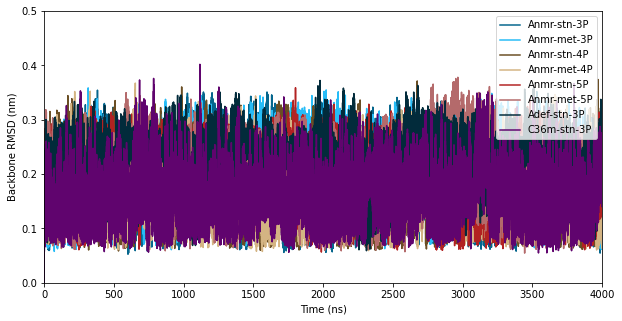

In [4]:
dfs = []
fig, ax = plt.subplots(figsize=(10, 5))
for color, legend_name, file_name in zip(colors, plot_legend_test_list, inFolder_names):
    df = pd.read_csv(f"{rmse_folder}test_{file_name}_rmsd_traj4us.xvg", skiprows=18, delim_whitespace=True, names=["time", "rmsd"])
    dfs.append(df)
    ax.plot(df["time"], df["rmsd"], color=color, label=legend_name)
ax.set_xlim(0, 4000)
ax.set_ylim(0, 0.5)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Backbone RMSD (nm)")
ax.legend()

In [5]:
dfs[0].head()

time      rmsd
0  0.00  0.000483
1  0.01  0.068787
2  0.02  0.085409
3  0.03  0.098903
4  0.04  0.080413

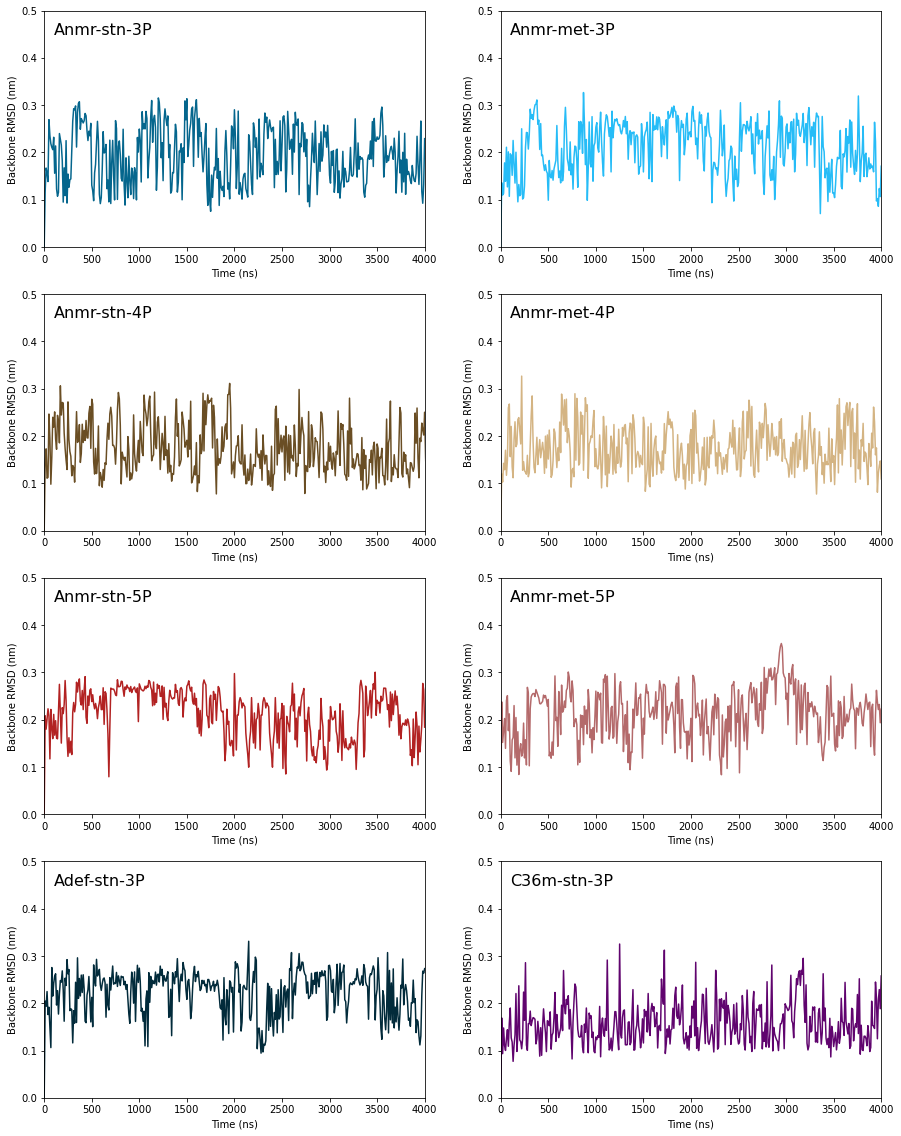

In [11]:
dfs = []
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for color, legend_name, file_name, i in zip(colors, plot_legend_test_list, inFolder_names, range(len(inFolder_names))):
    df = pd.read_csv(f"{rmse_folder}test_{file_name}_rmsd_traj4us.xvg", skiprows=18, delim_whitespace=True, names=["time", "rmsd"])
    df = df.iloc[::1000, :]
    dfs.append(df)
    ax[i//2, i%2].plot(df["time"], df["rmsd"], color=color, label=legend_name)
    ax[i//2, i%2].set_xlim(0, 4000)
    ax[i//2, i%2].set_ylim(0, 0.5)
    ax[i//2, i%2].set_xlabel("Time (ns)")
    ax[i//2, i%2].set_ylabel("Backbone RMSD (nm)")
    ax[i//2, i%2].text(100, 0.45, legend_name, fontsize=16)
fig.savefig(f"{rmse_folder}all_rmsd_traj4us.pdf", bbox_inches='tight')
fig.savefig(f"{rmse_folder}all_rmsd_traj4us.svg", bbox_inches='tight')